In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import files
uploaded = files.upload()
import pandas as pd

file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)
df.head()

Saving Space_Missions.csv to Space_Missions.csv


,Unnamed: 0.1,Unnamed: 0,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [4]:
df = pd.read_csv(file_name)
df.head()

,Unnamed: 0.1,Unnamed: 0,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


**Explanation**

>`read_csv()`: loads our dataset

>`head()`: displays the first 5 rows

>This helps us understand the structure and columns of the dataset.

Initial Exploration

`Explanation`

Tells total rows and columns.

Shows all column names so we know what data is present.

In [5]:
print("Shape:", df.shape)
print("\nColumns names:\n", df.columns.tolist())

Shape: (4324, 9)

Columns names:
 ['Unnamed: 0.1', 'Unnamed: 0', 'Company Name', 'Location', 'Datum', 'Detail', 'Status Rocket', ' Rocket', 'Status Mission']


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    4324 non-null   int64 
 1   Unnamed: 0      4324 non-null   int64 
 2   Company Name    4324 non-null   object
 3   Location        4324 non-null   object
 4   Datum           4324 non-null   object
 5   Detail          4324 non-null   object
 6   Status Rocket   4324 non-null   object
 7    Rocket         964 non-null    object
 8   Status Mission  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


In [7]:
df.describe()

,Unnamed: 0.1,Unnamed: 0
count,4324.000000,4324.000000
mean,2161.500000,2161.500000
std,1248.375611,1248.375611
min,0.000000,0.000000
25%,1080.750000,1080.750000
50%,2161.500000,2161.500000
75%,3242.250000,3242.250000
max,4323.000000,4323.000000


**Explanation**

Shows:

Data types `(int, float, object, datetime)`

Null values

Memory usage

Helps prepare for cleaning.

**Data Cleaning**

---
Remove Unnecessary Columns


In [8]:
df = df.drop(columns=["Unnamed: 0", "Unnamed: 0.1"])

**Finding Missing Values**


In [9]:
df.isnull().sum()

,0
Company Name,0
Location,0
Datum,0
Detail,0
Status Rocket,0
Rocket,3360
Status Mission,0


**View Missing Values with Heatmap**

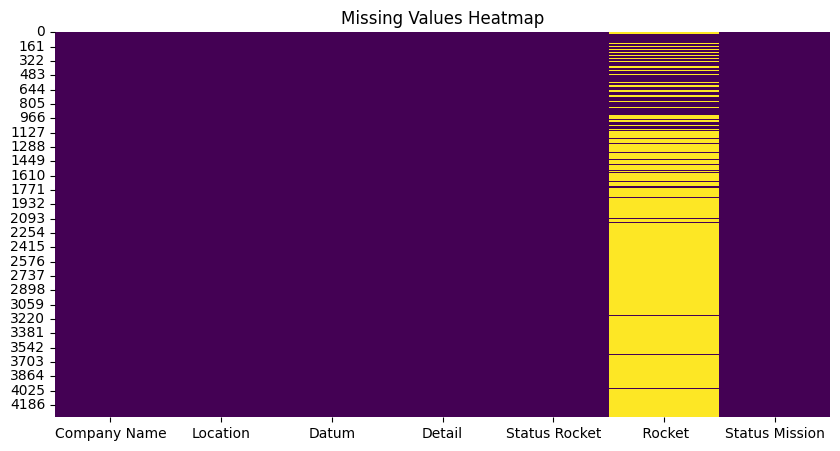

In [10]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

**Check Duplicates**

In [11]:
print("Duplicate:", df.duplicated().sum())

Duplicate: 1


**Convert Date Column**

In [12]:
df['Datum'] = pd.to_datetime(df['Datum'], errors='coerce')
df.dtypes

,0
Company Name,object
Location,object
Datum,"datetime64[ns, UTC]"
Detail,object
Status Rocket,object
Rocket,object
Status Mission,object


**Rename Column:  Status Rocket to Rocket Status**

In [13]:
df = df.rename(columns={"Status Rocket": "Rocket Status"})
df['Rocket Status']

,Rocket Status
0,StatusActive
1,StatusActive
2,StatusActive
3,StatusActive
4,StatusActive
...,...
4319,StatusRetired
4320,StatusRetired
4321,StatusRetired
4322,StatusRetired


**Rename Column: Rocket to Cost**

In [14]:
df = df.rename(columns={" Rocket": "Cost"})
df[['Detail', 'Cost']].head()

,Detail,Cost
0,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,50.0
1,Long March 2D | Gaofen-9 04 & Q-SAT,29.75
2,Starship Prototype | 150 Meter Hop,NaN
3,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,65.0
4,Atlas V 541 | Perseverance,145.0


**Handling Missing Values**


> Convert Cost to Numeric



In [15]:
df['Cost'] = pd.to_numeric(df['Cost'], errors='coerce')
print('dtype:', df['Cost'].dtypes)

dtype: float64


**fill missing values**

In [16]:
df['Cost'] = df['Cost'].fillna(df['Cost'].mean())
df[['Detail', 'Rocket Status', 'Cost']].head(7)

,Detail,Rocket Status,Cost
0,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.000000
1,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.750000
2,Starship Prototype | 150 Meter Hop,StatusActive,129.795237
3,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.000000
4,Atlas V 541 | Perseverance,StatusActive,145.000000
5,"Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.680000
6,Soyuz 2.1a | Progress MS-15,StatusActive,48.500000


In [17]:
df["Rocket Status"] = df["Rocket Status"].fillna(df["Rocket Status"].mode()[0])
df.head()

,Company Name,Location,Datum,Detail,Rocket Status,Cost,Status Mission
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.000000,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.750000,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,129.795237,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.000000,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.000000,Success


**Re-check Info and Null values After Cleaning**

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Company Name    4324 non-null   object             
 1   Location        4324 non-null   object             
 2   Datum           4198 non-null   datetime64[ns, UTC]
 3   Detail          4324 non-null   object             
 4   Rocket Status   4324 non-null   object             
 5   Cost            4324 non-null   float64            
 6   Status Mission  4324 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), object(5)
memory usage: 236.6+ KB


In [19]:
df.isnull().sum()

,0
Company Name,0
Location,0
Datum,126
Detail,0
Rocket Status,0
Cost,0
Status Mission,0


**Feature Engineering**

>We create new features from the `Datum` column to analyze patterns.

In [20]:
df['year'] = df['Datum'].dt.year
df['month'] = df['Datum'].dt.month
df['day'] = df['Datum'].dt.day
df['weekday'] = df['Datum'].dt.weekday
df.dtypes

,0
Company Name,object
Location,object
Datum,"datetime64[ns, UTC]"
Detail,object
Rocket Status,object
Cost,float64
Status Mission,object
year,float64
month,float64
day,float64


**Univariate Analysis**

Missions Per Company

In [21]:
# Set theme
sns.set(style='whitegrid')

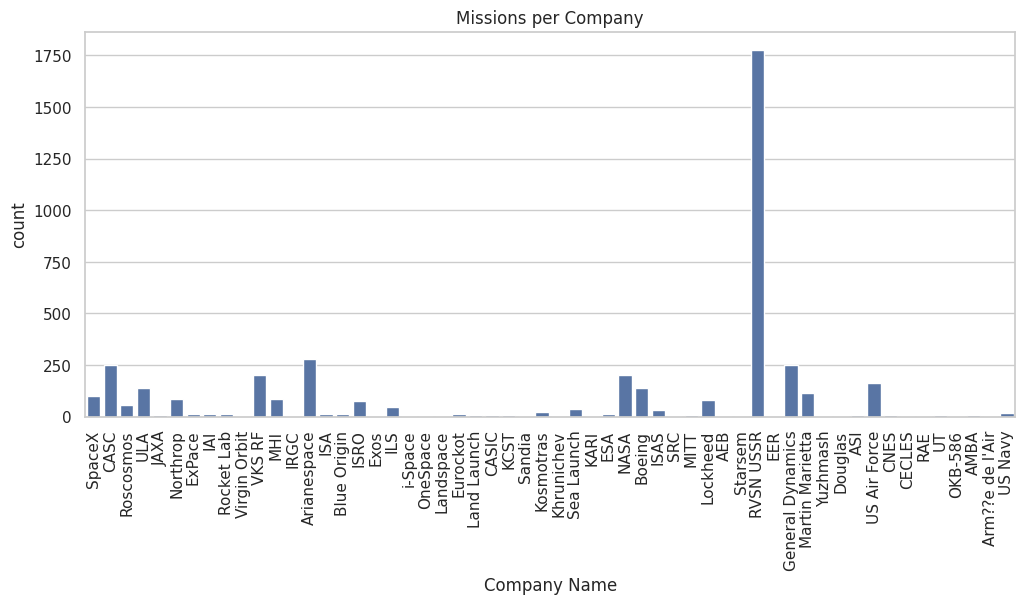

In [22]:
plt.figure(figsize=(12,5))
sns.countplot(x='Company Name', data=df)
plt.xticks(rotation=90)
plt.title("Missions per Company")
plt.show()

**Mission Outcome Distribution**


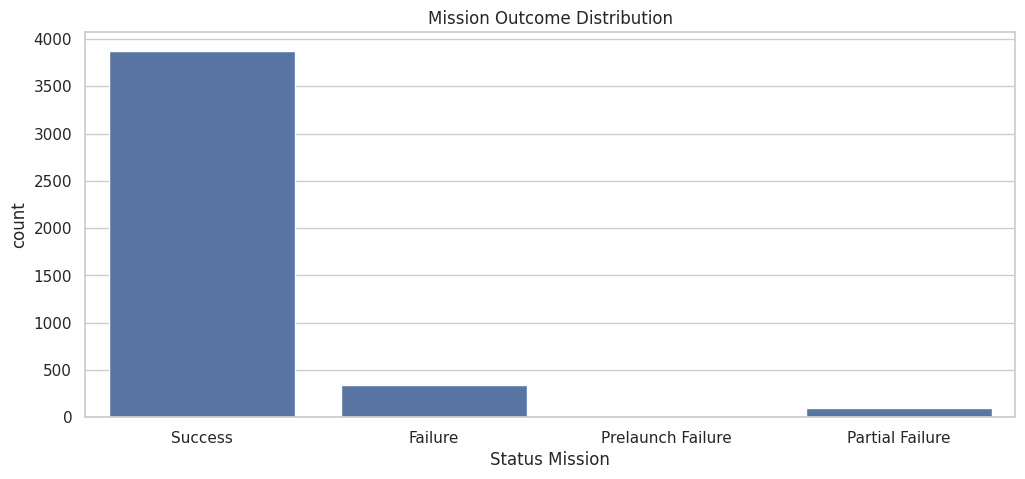

In [23]:
plt.figure(figsize=(12,5))
sns.countplot(x='Status Mission', data=df)
plt.title("Mission Outcome Distribution")
plt.show()

**Rocket Cost Distribution**

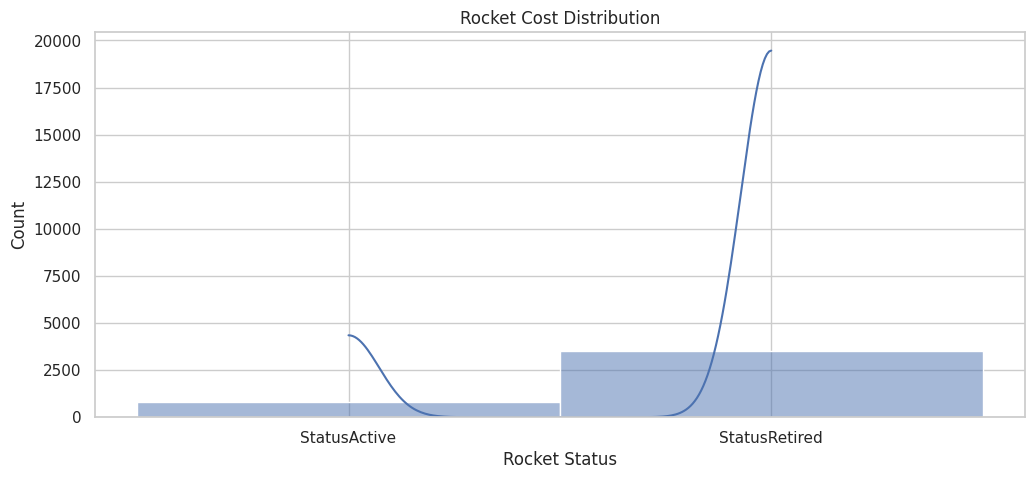

In [24]:
plt.figure(figsize=(12,5))
sns.histplot(df['Rocket Status'], kde=True)
plt.title("Rocket Cost Distribution")
plt.show()

**Bivariate Analysis**


**Year vs Rocket Status Trend (Line)**

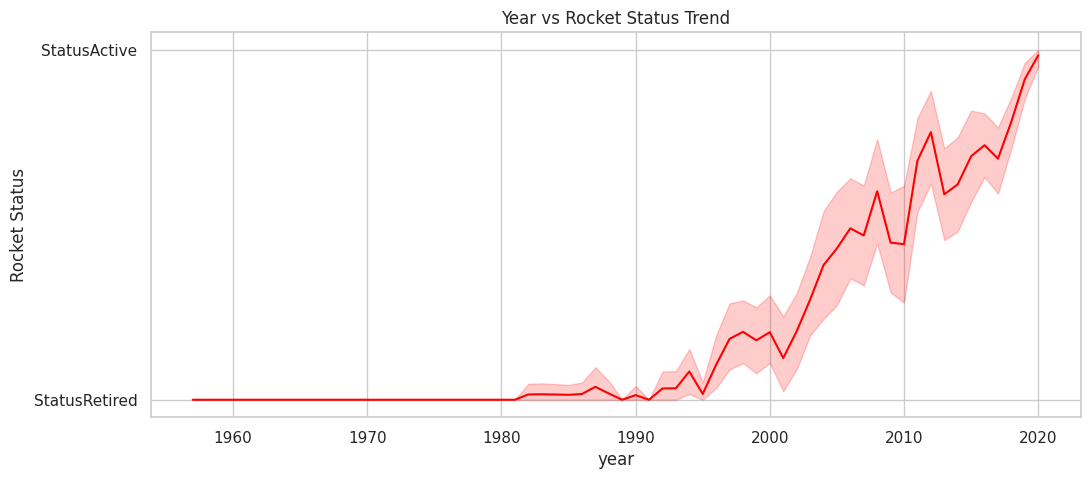

In [25]:
plt.figure(figsize=(12,5))
sns.lineplot(x='year', y='Rocket Status', data=df, color='red')
plt.title("Year vs Rocket Status Trend")
plt.show()

**Top 10 Companies by Total Cost**

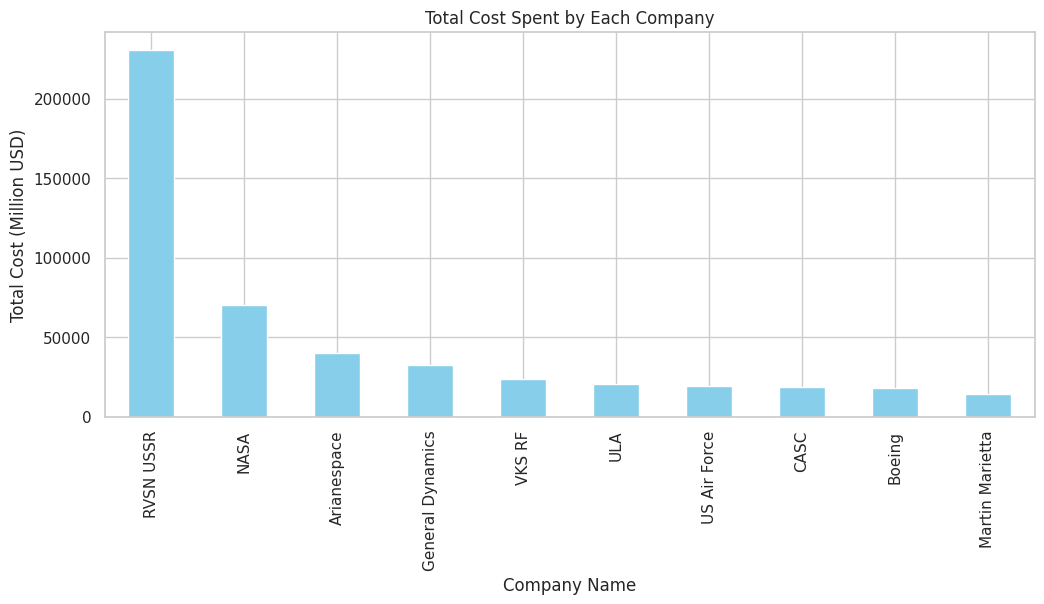

In [26]:
# Total cost spent by each company
company_cost = df.groupby("Company Name")["Cost"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,5))
company_cost.plot(kind='bar', color='skyblue')
plt.title("Total Cost Spent by Each Company")
plt.xlabel("Company Name")
plt.ylabel("Total Cost (Million USD)")
plt.xticks(rotation=90)
plt.show()


**Company vs Mission Outcome**

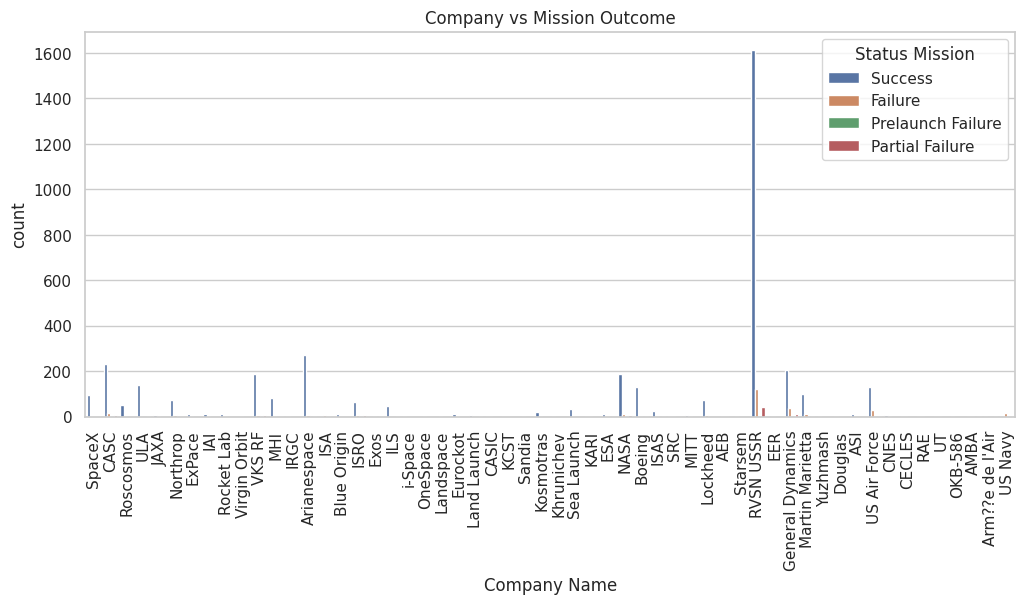

In [27]:
plt.figure(figsize=(12,5))
sns.countplot(x='Company Name', hue='Status Mission', data=df)
plt.xticks(rotation=90)
plt.title("Company vs Mission Outcome")
plt.show()

**Correlation Heatmap**

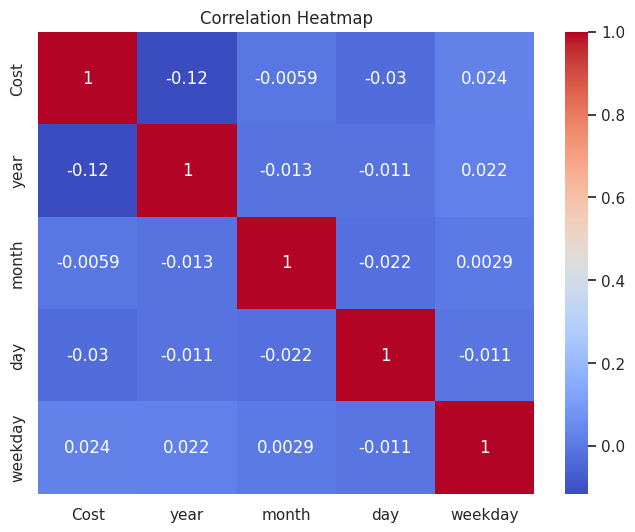

In [29]:
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()